In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic') 
%matplotlib inline

# 1. openAPI 활용 및 json 데이터 읽기
## API : Application Programming Interface
## 서울시 데이터 포털에서 공공 API 활용하기
### 서울시 동별 인구통계
### http://data.seoul.go.kr/dataList/datasetView.do?infId=10043&srvType=S&serviceKind=2&currentPageNo=1

In [2]:
import requests

In [3]:
url = 'http://openapi.seoul.go.kr:8088'
api_key = 'sample' #개인인증키 발급받은 후, 입력
return_format = 'json'
service_id = 'octastatapi10043'
start_idx = 1
end_idx = 5

request_url = '/'.join([url, api_key, return_format, service_id, str(start_idx), str(end_idx)])
print(request_url)
# 'http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/500/' 


http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/5


In [4]:
response = requests.get(request_url)

In [5]:
response.text
#JSON 형태

'{"octastatapi10043":{"list_total_count":450,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"GIGAN":"\ufeff2019.1/4","JACHIGU":"합계","DONG":"합계","SEDAE":"4,290,922","GYE_1":"10,054,979","NAMJA_1":"4,909,387","YEOJA_1":"5,145,592","GYE_2":"9,770,216","NAMJA_2":"4,772,134","YEOJA_2":"4,998,082","GYE_3":"284,763","NAMJA_3":"137,253","YEOJA_3":"147,510","SEDAEDANGINGU":"2.28","N_65SEISANGGORYEONGJA":"1,436,125"},{"GIGAN":"2019.1/4","JACHIGU":"종로구","DONG":"소계","SEDAE":"73,914","GYE_1":"162,913","NAMJA_1":"78,963","YEOJA_1":"83,950","GYE_2":"152,778","NAMJA_2":"74,536","YEOJA_2":"78,242","GYE_3":"10,135","NAMJA_3":"4,427","YEOJA_3":"5,708","SEDAEDANGINGU":"2.07","N_65SEISANGGORYEONGJA":"26,981"},{"GIGAN":"2019.1/4","JACHIGU":"종로구","DONG":"사직동","SEDAE":"4,552","GYE_1":"9,782","NAMJA_1":"4,432","YEOJA_1":"5,350","GYE_2":"9,504","NAMJA_2":"4,270","YEOJA_2":"5,234","GYE_3":"278","NAMJA_3":"162","YEOJA_3":"116","SEDAEDANGINGU":"2.09","N_65SEISANGGORYEONGJA":"1,770"},{"GIGAN":"2019.1/4

### json (Java Script Object Notation)

### 1) json 설명: https://ko.wikipedia.org/wiki/JSON
### 2) json online editor: https://jsoneditoronline.org/

In [6]:
sample = ' { \
    "이름": "김지아", \
    "나이": 25, \
    "성별": "여", \
    "주소": "서울특별시 양천구 목동",\
    "특기": ["농구", "도술"],\
    "가족관계": {"#": 2, "아버지": "홍판서", "어머니": "춘섬"},\
    "회사": "경기 수원시 팔달구 우만동"\
 }'

In [3]:
import json

In [8]:
jsonsample = json.loads(sample)

In [9]:
# json의 특정 항목에 접근
jsonsample['가족관계']['아버지']

'홍판서'

In [10]:
#API 결과를 json 포맷으로 변환
jsondata = response.json()

In [11]:
jsondata = jsondata['octastatapi10043']['row']
동별인구통계 = DataFrame(jsondata)
동별인구통계

,DONG,GIGAN,GYE_1,GYE_2,GYE_3,JACHIGU,NAMJA_1,NAMJA_2,NAMJA_3,N_65SEISANGGORYEONGJA,SEDAE,SEDAEDANGINGU,YEOJA_1,YEOJA_2,YEOJA_3
0,합계,﻿2019.1/4,"10,054,979","9,770,216","284,763",합계,"4,909,387","4,772,134","137,253","1,436,125","4,290,922",2.28,"5,145,592","4,998,082","147,510"
1,소계,2019.1/4,"162,913","152,778","10,135",종로구,"78,963","74,536","4,427","26,981","73,914",2.07,"83,950","78,242","5,708"
2,사직동,2019.1/4,"9,782","9,504",278,종로구,"4,432","4,270",162,"1,770","4,552",2.09,"5,350","5,234",116
3,삼청동,2019.1/4,"3,045","2,804",241,종로구,"1,445","1,322",123,636,"1,400",2,"1,600","1,482",118
4,부암동,2019.1/4,"10,523","10,111",412,종로구,"5,012","4,832",180,"1,752","4,295",2.35,"5,511","5,279",232


# 2. folium 을 활용한 지도 시각화

In [6]:
#folium 라이브러리 설치
# anaconda prompt에서 'pip install folium' 실행
import folium

In [13]:
map1 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 15)
map1
# 서울시청을 지도의 중심으로, 지도를 그려줌. 
# zoom_start는 지도를 그릴 때 얼마나 zoom 해서 보여줄 지를 결정.  값이 클수록, zoom in

In [9]:
# Marker 추가하기 (지도에 지점 추가하기)
folium.Marker([37, 126], popup = '테스트지점').add_to(map1)

In [11]:
map1

In [16]:
측정위치 = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', 
                      skiprows = [0,1,3])
측정위치.head()

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사


In [17]:
측정위치50 = 측정위치[['조사지점명', 'X좌표', 'Y좌표']].iloc[:50]
측정위치50
# 50개의 측정 위치에 대해 필요한 정보만 저장

,조사지점명,X좌표,Y좌표
0,신흥모피명품전문크리닝.,196423.97707,455511.52968
1,GS25,196315.80243,455621.38262
2,세검정정류장,196357.17125,455680.82580
3,안성타워內 굿모닝파워공인중개사.,197904.19277,456718.34996
4,복실 손뜨기.,196360.44943,456405.89296
5,24시 동대문 설렁탕.,200966.43423,452483.73642
6,서울전문학교.,201686.66781,452747.41594
7,서울 종묘농약,200231.75517,452355.91115
8,서울 종묘농약,200231.75517,452355.91115
9,삼성카드빌딩,199935.57893,452934.78947


In [18]:
# 위치 정보 변환을 위한 라이브러리 설치
# pip install pyproj
#conda install pyproj
from pyproj import Proj, transform

In [19]:
# X좌표, Y좌표를 위도와 경도로 변환하는 함수 선언
def convert(x,y):
    inProj = Proj(init = 'epsg:5181')
    outProj = Proj(init = 'epsg:4326')
    x2,y2 = transform(inProj, outProj, x, y)
    return [y2, x2]

In [20]:
#측정위치50에 위도와 경도 정보를 추가
측정위치50['위경도'] = 측정위치50.apply(lambda 지점: convert(지점['X좌표'], 지점['Y좌표']), axis = 1)
측정위치50.head(3)

,조사지점명,X좌표,Y좌표,위경도
0,신흥모피명품전문크리닝.,196423.97707,455511.52968,"[37.59916962231494, 126.95950527754184]"
1,GS25,196315.80243,455621.38262,"[37.600158960377534, 126.95827976042075]"
2,세검정정류장,196357.17125,455680.82580,"[37.60069470246644, 126.95874792945385]"


In [209]:
for index, row in 측정위치50.iterrows():
    print(row)

조사지점명                               신흥모피명품전문크리닝.
X좌표                                       196424
Y좌표                                       455512
위경도      [37.59916962231494, 126.95950527754184]
Name: 0, dtype: object
조사지점명                                        GS25
X좌표                                        196316
Y좌표                                        455621
위경도      [37.600158960377534, 126.95827976042075]
Name: 1, dtype: object
조사지점명                                     세검정정류장
X좌표                                       196357
Y좌표                                       455681
위경도      [37.60069470246644, 126.95874792945385]
Name: 2, dtype: object
조사지점명                         안성타워內 굿모닝파워공인중개사.
X좌표                                      197904
Y좌표                                      456718
위경도      [37.6100475136769, 126.97626371692706]
Name: 3, dtype: object
조사지점명                                   복실 손뜨기.
X좌표                                      196360
Y좌표                         

In [210]:
#측정위치 50개를 지도에 표시
for index, row in 측정위치50.iterrows():
    folium.Marker(row['위경도'], popup = row['조사지점명']).add_to(map1)

In [23]:
map1

# 3. 서울시 유동인구 분석

## 데이터 적재

In [25]:
유동인구 = pd.read_excel('data/서울시유동인구/0_유동인구_유동인구기본_2015.xlsx', 
                      skiprows = [0,1,3])

In [26]:
data = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', 
                     sheetname = None, skiprows = [0,1,3])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [27]:
data.keys()

odict_keys(['유동인구_조사지점정보_2015', 'FTPTH_STLE_CN', 'GU_CD', 'DONG_CD', 'SM_GU_CD'])

In [28]:
조사지점 = data.get('유동인구_조사지점정보_2015')
구코드 = data.get('GU_CD')
동코드 = data.get('DONG_CD')
집계구코드 = data.get('SM_GU_CD')

## 3.2 데이터 탐색 

### 3.2.1 유동인구 데이터 탐색

In [39]:
# 전체 특징 파악
# 1. 102956개의 데이터
# 2. 결측값 있는 컬럼 없음
유동인구.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102956 entries, 0 to 102955
Data columns (total 7 columns):
ID유동인구조사    102956 non-null int64
조사지점코드      102956 non-null object
조사구분        102956 non-null object
조사요일        102956 non-null object
시간대         102956 non-null object
유동인구수       102956 non-null float64
년도          102956 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ MB


In [54]:
columns = ['조사구분','조사요일','시간대']
for col in columns:
    print('------', col, '---------')
    print(유동인구[col].value_counts())


------ 조사구분 ---------
본조사       85890
계절요인조사    14000
지하철        2058
북촌         1008
Name: 조사구분, dtype: int64
------ 조사요일 ---------
토    21000
금    20986
월    19978
수    19978
화    18046
목     2968
Name: 조사요일, dtype: int64
------ 시간대 ---------
16시-17시    7354
09시-10시    7354
18시-19시    7354
08시-09시    7354
11시-12시    7354
10시-11시    7354
14시-15시    7354
17시-18시    7354
12시-13시    7354
13시-14시    7354
07시-08시    7354
19시-20시    7354
20시-21시    7354
15시-16시    7354
Name: 시간대, dtype: int64


In [ ]:
# 조사구분이 본조사인 데이터만 활용하기로 결정
유동인구[유동인구.조사구분 == '본조사']

In [69]:
정제된유동인구 = 유동인구[유동인구.조사구분 == '본조사']

In [70]:
# 1. 유동인구 조사지점 갯수 확인
print('유동인구 조사지점 개수: ', len(유동인구.조사지점코드.unique()))
print('정제된유동인구 조사지점 개수: ', len(정제된유동인구.조사지점코드.unique()))

유동인구 조사지점 개수:  1300
정제된유동인구 조사지점 개수:  1227


In [71]:
# 2. 조사지점별 조사 횟수 확인
print('유동인구 조사지점 개수 \n', 유동인구.조사지점코드.value_counts().value_counts())
print('정제된유동인구 조사지점 개수\n', 정제된유동인구.조사지점코드.value_counts().value_counts())

유동인구 조사지점 개수 
 70     1027
140     200
42       73
Name: 조사지점코드, dtype: int64
정제된유동인구 조사지점 개수
 70    1227
Name: 조사지점코드, dtype: int64


In [72]:
# 3. 조사구분 값 확인

In [73]:
# 조사지점별 요일별 시간대별로 조사 횟수 확인
정제된유동인구.pivot_table(index = '조사요일', columns = '시간대', values = 'ID유동인구조사', aggfunc = 'count')

시간대,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시
조사요일,,,,,,,,,,,,,,
금,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
목,8,8,8,8,8,8,8,8,8,8,8,8,8,8
수,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
월,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
토,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
화,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219


### 3.2.2 조사지점 데이터 탐색

In [79]:
조사지점.info()
# 구코드와 동코드가 없는 조사지점이 있다. (92/1500)
# X,Y 좌표가 없는 조사지점도 있다. (87/1500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
조사지점코드      1500 non-null object
조사지점명       1500 non-null object
구코드         1408 non-null float64
동코드         1408 non-null float64
주번지         1418 non-null object
부번지         1373 non-null object
도로명         1233 non-null object
보도너비        1421 non-null float64
차선수         1421 non-null float64
버스차로유무      1421 non-null object
중앙선여부       1421 non-null object
장애물유무       1421 non-null object
장애물종류       1421 non-null object
보행도로구분      1421 non-null object
점자블록유무      1421 non-null object
경사로유무       1421 non-null object
펜스유무        1421 non-null object
버스정류장유무     1421 non-null object
기타시설유무      0 non-null float64
지하철유무       1421 non-null object
횡단보도유무      1421 non-null object
보도형태        0 non-null float64
글로벌존지역명     0 non-null float64
주거지역명       0 non-null float64
지역중심명       0 non-null float64
지역중심상세명     0 non-null float64
지구중심명       0 non-null float64
지구중심상세내용    

In [81]:
# 조사구분 확인
조사지점.조사구분.value_counts()
# 본조사만 활용하기로 결정

본조사       1227
계절요인조사     200
지하철         49
북촌          24
Name: 조사구분, dtype: int64

In [82]:
정제된조사지점 = 조사지점[조사지점.조사구분 == '본조사']

In [84]:
정제된조사지점.info()
# 구코드, 동코드 결측 데이터 15건/1227건
# X,Y 좌표 경측 데이터 10건/1227건

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1426
Data columns (total 37 columns):
조사지점코드      1227 non-null object
조사지점명       1227 non-null object
구코드         1212 non-null float64
동코드         1212 non-null float64
주번지         1218 non-null object
부번지         1188 non-null object
도로명         1033 non-null object
보도너비        1221 non-null float64
차선수         1221 non-null float64
버스차로유무      1221 non-null object
중앙선여부       1221 non-null object
장애물유무       1221 non-null object
장애물종류       1221 non-null object
보행도로구분      1221 non-null object
점자블록유무      1221 non-null object
경사로유무       1221 non-null object
펜스유무        1221 non-null object
버스정류장유무     1221 non-null object
기타시설유무      0 non-null float64
지하철유무       1221 non-null object
횡단보도유무      1221 non-null object
보도형태        0 non-null float64
글로벌존지역명     0 non-null float64
주거지역명       0 non-null float64
지역중심명       0 non-null float64
지역중심상세명     0 non-null float64
지구중심명       0 non-null float64
지구중심상세내용    

In [88]:
# 구코드, 동코드, X좌표, Y좌표가 없는 데이터 확인
정제된조사지점[정제된조사지점.구코드.isnull()][['조사지점코드','조사지점명','구코드','동코드','X좌표','Y좌표', '조사구분']]



,조사지점코드,조사지점명,구코드,동코드,X좌표,Y좌표,조사구분
86,02-001,태화빌딩,NaN,NaN,201229.42149,451734.49400,본조사
87,02-002,성동공업고등학교정문 우측 담벽,NaN,NaN,201422.94083,452156.57649,본조사
89,02-008,돈신댓잎갈비,NaN,NaN,201281.67500,451147.01769,본조사
113,02-093,성동 그리스도의 교회 앞,NaN,NaN,201630.54844,451160.73017,본조사
116,02-105,참꽃 스튜디오,NaN,NaN,201237.29334,451746.57843,본조사
702,13-5001,엔제리너스,NaN,NaN,NaN,NaN,본조사
704,13-5002,버거킹,NaN,NaN,NaN,NaN,본조사
705,13-5003,사러가쇼핑센터 앞,NaN,NaN,NaN,NaN,본조사
706,13-5004,김상우추앤추한의원(2층),NaN,NaN,NaN,NaN,본조사
707,13-5005,비타민약국 앞,NaN,NaN,NaN,NaN,본조사


In [92]:
# 해당 데이터는 미활용하기로 결정
정제된조사지점 = 정제된조사지점[정제된조사지점.구코드.notnull()]

### 3.2.3 데이터 합치기 - 분석에 필요한 컬럼들만 선택 (어떤 분석을 할지에 따라 변경 가능함)

In [95]:
최종데이터 = pd.merge(정제된유동인구, 정제된조사지점[['조사지점코드', '조사지점명', '구코드', '동코드', 'X좌표', 'Y좌표', '집계구코드']])

In [99]:
최종데이터 = pd.merge(최종데이터, 구코드[['구코드', '구명']])

In [100]:
최종데이터 = pd.merge(최종데이터, 동코드[['동코드', '동명']])

In [102]:
최종데이터.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84840 entries, 0 to 84839
Data columns (total 15 columns):
ID유동인구조사    84840 non-null int64
조사지점코드      84840 non-null object
조사구분        84840 non-null object
조사요일        84840 non-null object
시간대         84840 non-null object
유동인구수       84840 non-null float64
년도          84840 non-null int64
조사지점명       84840 non-null object
구코드         84840 non-null float64
동코드         84840 non-null float64
X좌표         84840 non-null float64
Y좌표         84840 non-null float64
집계구코드       84840 non-null float64
구명          84840 non-null object
동명          84840 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 10.4+ MB


## (실습 #1) 유동인구를 요일과 시간대 별로 분석하여, 유동인구가 가장 많은 상위 10개의 요일과 시간대를 출력. (e.g., 금요일 18시-19시가 유동인구가 가장 많음.)


In [106]:
최종데이터.pivot_table(index = ['조사요일', '시간대'], values = '유동인구수', aggfunc = 'sum') \
                    .sort_values(by = '유동인구수', ascending = False).head(10)

유동인구수
조사요일 시간대              
금    18시-19시  850851.0
수    18시-19시  829428.0
토    18시-19시  811800.0
화    18시-19시  800607.0
월    18시-19시  779376.0
금    19시-20시  775071.0
토    17시-18시  744243.0
     19시-20시  728286.0
화    19시-20시  722721.0
수    19시-20시  706170.0

## (실습 #2) 서울시 각 구별 전체 유동인구 분석
### 구별로 조사지점의 개수가 다르므로, 조사지점 당 평균 유동인구수로 분석

In [116]:
# 구별로 수집데이터 개수가 다른지 확인
#print(최종데이터.구코드.value_counts())
# 조사지점별로는 총 70회로 조사 횟수는 동일하므로, 구별로 조사지점의 개수가 다름을 알 수 있음. 
최종데이터.pivot_table(index = '구코드', values = '조사지점코드', aggfunc = Series.nunique)
# aggfunc 에 pandas.Series.nunique를 하면 distinct unique value의 개수를 알 수 있음

,조사지점코드
구코드,
11010.0,76
11020.0,70
11030.0,50
11040.0,36
11050.0,39
11060.0,47
11070.0,42
11080.0,43
11090.0,33


In [118]:
구별유동인구 = 최종데이터.pivot_table(index = '구명', values = '유동인구수', aggfunc = 'mean')

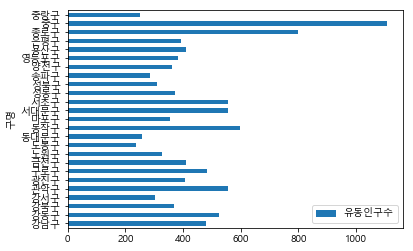

In [119]:
구별유동인구.plot(kind = 'barh')

## (실습 #3) 서울시 각 구별로 출퇴근 시간의 유동인구 분석 (출퇴근 시간은 7시-10시, 18시-21시로 가정함)


In [120]:
최종데이터.head(1)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,집계구코드,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동


In [123]:
시간대 = 최종데이터.시간대.unique()
시간대

array(['07시-08시', '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시',
       '13시-14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시',
       '19시-20시', '20시-21시'], dtype=object)

In [124]:
출근시간대 = 시간대[:3]
퇴근시간대 = 시간대[-3:]

In [136]:
최종데이터['출퇴근여부'] = 최종데이터.시간대.map({
    '07시-08시': '출근',
    '08시-09시': '출근',
    '09시-10시': '출근',
    '10시-11시': '일반',
    '11시-12시': '일반',
    '12시-13시': '일반',
    '13시-14시': '일반',
    '14시-15시': '일반',
    '15시-16시': '일반',
    '16시-17시': '일반',
    '17시-18시': '일반',
    '18시-19시': '퇴근',
    '19시-20시': '퇴근',
    '20시-21시': '퇴근',
})
최종데이터.head(10)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,집계구코드,구명,동명,출퇴근여부
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,출근
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,출근
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,출근
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,일반
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,일반
5,3072,01-003,본조사,금,12시-13시,48.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,일반
6,3073,01-003,본조사,금,13시-14시,30.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,일반
7,3074,01-003,본조사,금,14시-15시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,일반
8,3075,01-003,본조사,금,15시-16시,30.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,일반
9,3076,01-003,본조사,금,16시-17시,39.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동,일반


In [140]:
출퇴근시간대구별유동인구 = 최종데이터.pivot_table(index = '구명', columns = '출퇴근여부', values = '유동인구수', aggfunc = 'mean')

In [141]:
출퇴근시간대구별유동인구

출퇴근여부,일반,출근,퇴근
구명,,,
강남구,478.337812,327.305000,627.910000
강동구,539.208333,348.433333,657.838889
강북구,365.993182,312.169697,438.363636
강서구,285.248571,298.874286,360.348571
관악구,527.753049,498.639024,687.487805
광진구,377.778846,255.523077,631.692308
구로구,465.596809,447.859574,563.446809
금천구,375.375000,392.339130,517.713043
노원구,337.292958,228.661972,400.490141


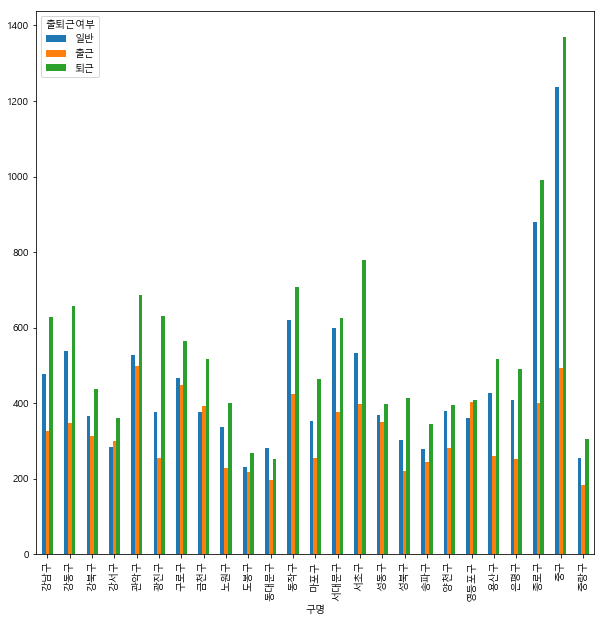

In [144]:
출퇴근시간대구별유동인구.plot(kind = 'bar', figsize = (10,10))

In [145]:
# 실습. 출퇴근 시간대 유동인구와 그 외 시간대 유동인구가 가장 많이 차이나는 구 5개 찾기

In [147]:
출퇴근시간대구별유동인구['출퇴근'] = (출퇴근시간대구별유동인구.출근 + 출퇴근시간대구별유동인구.퇴근)/2

In [149]:
출퇴근시간대구별유동인구['차이'] = abs(출퇴근시간대구별유동인구.출퇴근 - 출퇴근시간대구별유동인구.일반)

In [151]:
출퇴근시간대구별유동인구.sort_values(by = '차이', ascending = False).head()

출퇴근여부,일반,출근,퇴근,출퇴근,차이
구명,,,,,
중구,1236.511071,492.288571,1370.722857,931.505714,305.005357
종로구,878.625000,399.286842,990.955263,695.121053,183.503947
서대문구,599.440179,376.492857,625.064286,500.778571,98.661607
금천구,375.375000,392.339130,517.713043,455.026087,79.651087
광진구,377.778846,255.523077,631.692308,443.607692,65.828846


## (실습 #4) 평일 유동인구와 주말 유동인구를 분석하여, 그 차이가 가장 많이 나는 상위 5개 구 정보를 출력


In [159]:
최종데이터['주말여부'] = 최종데이터.조사요일.apply(lambda x: 1 if x in ['토'] else 0)

In [161]:
요일별구별유동인구 = 최종데이터.pivot_table(index = '구명', columns = '주말여부', values = '유동인구수', aggfunc = 'mean')
요일별구별유동인구

주말여부,0,1
구명,,
강남구,487.990848,438.160714
강동구,519.252976,541.732143
강북구,368.103896,377.422078
강서구,307.147959,292.714286
관악구,565.243902,517.740418
광진구,401.277473,424.846154
구로구,488.281915,460.691489
금천구,424.756211,348.531056
노원구,329.675553,319.083501


In [162]:
요일별구별유동인구.columns = ['주중','주말']
요일별구별유동인구['주중주말편차'] = (요일별구별유동인구['주중']-요일별구별유동인구['주말']).abs()

In [163]:
요일별구별유동인구.sort_values(by = '주중주말편차', ascending= False)

,주중,주말,주중주말편차
구명,,,
중구,1073.908163,1233.339796,159.431633
금천구,424.756211,348.531056,76.225155
용산구,397.695000,464.035714,66.340714
서대문구,569.382015,508.255102,61.126913
강남구,487.990848,438.160714,49.830134
관악구,565.243902,517.740418,47.503484
종로구,792.347509,830.512218,38.164709
성동구,377.909226,346.285714,31.623512
동작구,602.436688,574.253247,28.183442


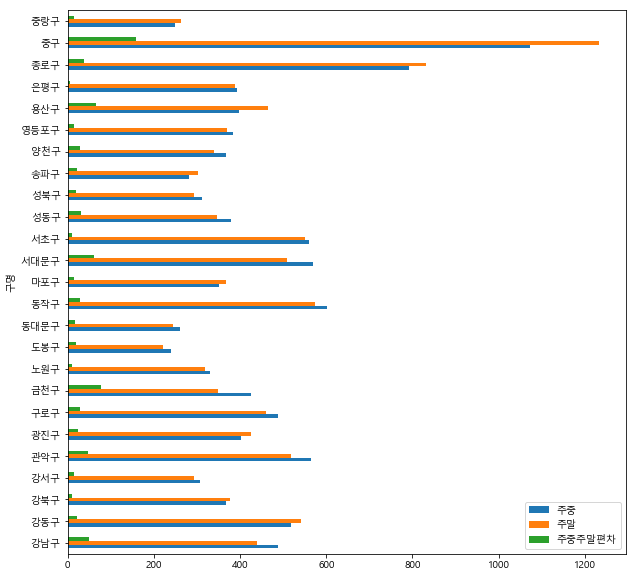

In [164]:
요일별구별유동인구.plot(kind = 'barh', figsize = (10,10))

## (실습 #5) 유동인구의 수와 보행환경 정보를 분석 (보행환경 정보는 유동인구상세로그_2015.xlsx의 보행환경 컬럼 참고. 매우불만족(1), 약간불만족(2), 보통(3), 약간만족(4), 매우만족(5) )
### 5.1 보행 환경 개선이 시급한 곳 10군데를 선정. 
### 5.2 보행환경점수가 가장 낮은 자치구 5개 찾기



In [166]:
유동인구_속성조사 = pd.read_excel('data/서울시유동인구/2_유동인구_속성조사_2015.xlsx', 
                      skiprows = [0,1,3])

In [168]:
# 데이터 탐색
유동인구_속성조사.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
ID속성조사       20000 non-null int64
조사지점코드       20000 non-null object
조사일자         20000 non-null int64
조사요일         20000 non-null object
남여구분         20000 non-null object
조사시간대        0 non-null float64
조사시간대_텍스트    20000 non-null object
연령대          20000 non-null object
거주지          19118 non-null object
통행주목적        20000 non-null object
방문횟수         20000 non-null object
동행자명         0 non-null float64
교통수단         0 non-null float64
보행환경         20000 non-null object
직업명          18574 non-null object
년도           20000 non-null int64
dtypes: float64(3), int64(3), object(10)
memory usage: 2.4+ MB


In [170]:
print('조사지점개수', len(유동인구_속성조사.조사지점코드.unique()))

조사지점개수 1000


In [173]:
유동인구_속성조사.조사지점코드.value_counts().value_counts()
# 모든 조사지점에서 20명의 조사결과가 있음

20    1000
Name: 조사지점코드, dtype: int64

In [121]:
def 보행환경(만족도):
    if 만족도 == '매우만족':
        return 5
    elif 만족도 == '약간만족':
        return 4
    elif 만족도 == '보통':
        return 3
    elif 만족도 == '약간불만족':
        return 2
    elif 만족도 == '매우불만족':
        return 1
    else:
        return 0

In [175]:
유동인구_속성조사['보행점수'] = 유동인구_속성조사.보행환경.map({
    '매우만족':5,
    '약간만족':4,
    '보통':3,
    '약간불만족':2,
    '매우불만족':1
})

In [177]:
유동인구_속성조사.head()

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도,보행점수
0,1,01-003,1016,금,여자,NaN,오전11시~오후2시,50-54세,종로구,업무관련,주1~2회,NaN,NaN,약간만족,전문/자유직,2015,4
1,2,01-003,1016,금,남자,NaN,오전11시~오후2시,60-64세,성북구,업무관련,주3~5회,NaN,NaN,매우만족,일용/작업직,2015,5
2,3,01-003,1016,금,남자,NaN,오전11시~오후2시,65세이상,종로구,업무관련,주3~5회,NaN,NaN,약간만족,일용/작업직,2015,4
3,4,01-003,1016,금,남자,NaN,오전7시30분~11시,45-49세,서대문구,출근,매일,NaN,NaN,약간만족,사무/기술직,2015,4
4,5,01-003,1016,금,남자,NaN,오전7시30분~11시,35-39세,도봉구,출근,매일,NaN,NaN,매우만족,사무/기술직,2015,5


In [182]:
지점별유동인구 = 최종데이터.pivot_table(index = '조사지점코드', values = '유동인구수', aggfunc = 'mean')

In [183]:
len(지점별유동인구)

1212

In [179]:
지점별보행점수 = 유동인구_속성조사.pivot_table(index = '조사지점코드', values = '보행점수', aggfunc = 'mean')

In [184]:
len(지점별보행점수)

1000

In [187]:
지점별 = pd.concat([지점별유동인구, 지점별보행점수], axis = 1, join = 'inner')
지점별

,유동인구수,보행점수
조사지점코드,,
01-003,41.357143,3.90
01-005,150.128571,2.35
01-008,75.942857,2.60
01-009,80.528571,3.05
01-016,889.542857,2.60
01-019,989.828571,2.50
01-020,1113.042857,2.30
01-028,351.342857,2.40
01-035,1817.271429,2.55


In [188]:
지점별.head(5)

,유동인구수,보행점수
조사지점코드,,
01-003,41.357143,3.90
01-005,150.128571,2.35
01-008,75.942857,2.60
01-009,80.528571,3.05
01-016,889.542857,2.60


In [195]:
정제된조사지점 = 정제된조사지점.set_index('조사지점코드')[['조사지점명','구코드','동코드','X좌표','Y좌표']]

In [198]:
지점별 = pd.concat([지점별, 정제된조사지점], axis = 1, join = 'inner')

In [205]:
# 보행환경이 시급한 지점 10군데 선정
# 보행평균점수가 2점 미만인 조사지점 중 유동인구가 많은 10군데 선택
개선시급지역 = 지점별[지점별.보행점수 < 2].sort_values(by = '유동인구수', ascending = False).head(10)

In [207]:
map2 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 15)

In [208]:
개선시급지역['위경도'] = 개선시급지역.apply(lambda 지점: convert(지점['X좌표'], 지점['Y좌표']), axis = 1)
개선시급지역.head(3)

,유동인구수,보행점수,조사지점명,구코드,동코드,X좌표,Y좌표,위경도
조사지점코드,,,,,,,,
01-213,3368.914286,1.95,cafe nanuri,11010.0,1101060.0,198528.06633,453727.84806,"[37.58310456094619, 126.98333547159028]"
17-2055,3242.828571,1.45,디큐브시티,11170.0,1117051.0,190016.40000,445484.99021,"[37.50878369212982, 126.8870826364644]"
01-2095,2193.857143,1.20,동아일보,11010.0,1101061.0,198026.60682,452265.43991,"[37.56992740808484, 126.97766212376528]"


In [211]:
for index, row in 개선시급지역.iterrows():
    msg = '조사지점명: {0}, 유동인구수: {1}, 보행점수:{2}'.format(row.조사지점명, row.유동인구수, row.보행점수)
    folium.Marker(row['위경도'], popup = msg).add_to(map2)

In [212]:
map2

In [218]:
구코드

,구코드,구명,년도
0,11010,종로구,2015
1,11020,중구,2015
2,11030,용산구,2015
3,11040,성동구,2015
4,11050,광진구,2015
5,11060,동대문구,2015
6,11070,중랑구,2015
7,11080,성북구,2015
8,11090,강북구,2015
9,11100,도봉구,2015


In [220]:
# 5.2 보행환경점수가 가장 낮은 자치구 5개 찾기
지점별 = pd.merge(지점별, 구코드)

In [223]:
자치구별보행점수 = 지점별.pivot_table(index = '구명', aggfunc = 'mean', values = '보행점수')

In [226]:
자치구별보행점수.sort_values(by = '보행점수').head()

,보행점수
구명,
구로구,2.250000
강남구,2.455072
영등포구,2.490566
성동구,2.571667
종로구,2.600000


In [227]:
# 보행환경이 가장 높은 자치구 5개
자치구별보행점수.sort_values(by = '보행점수', ascending = False).head()

,보행점수
구명,
중랑구,3.145946
도봉구,3.002000
광진구,2.961765
노원구,2.920161
서대문구,2.900000
